# Model to Error Intro
Model to error takes a model as input and returns error measure.

## Use the following code to submit your code.

In [1]:
import requests
import json
import pandas as pd
import numpy as np
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
import inspect
import matplotlib.pyplot as plt


def local_model_to_err(model="missing", dataset="M4", name="Hourly",
                       random_time="2018-08-31 19:00:00", n_train=500, p=5,
                       start_train="2018-10-31 19:00:00", end_train="2018-11-30 19:00:00",
                       end_test="2018-12-05 19:00:00", err_method="MAE"):

    if not model == "missing":
        model = inspect.getsource(model)

    response = requests.post("https://app-models.dominodatalab.com:443/models/5b2f10c7e4b0b612d4468533/latest/model",
                             auth=(
                                 "gJKkgzE6wtjq8fyc3F9qJlFBafgmUlZ9yPYd3krH4RzuXPX7nad9uZbqHtJ9Ukg2",
                                 "gJKkgzE6wtjq8fyc3F9qJlFBafgmUlZ9yPYd3krH4RzuXPX7nad9uZbqHtJ9Ukg2"
                             ),
                             json={
                                 "data": {"model": model, "dataset": dataset, "name": name,
                                          "random_time": random_time, "n_train": n_train, "p": p,
                                          "start_train": start_train, "end_train": end_train,
                                          "end_test": end_test, "err_method": err_method}
                             }
                             )
    return pd.read_json(json.loads(response.content)["result"])


## Define your model

Your model function should have following format:

### Function name: 

* mymodel

### Input: 

* data_train: pandas dataframe. Each column is a time series

* n_test: number of prediction to make for each time series

### Output:

* pandas data frame of predictions with n_test rows

## Example


915.8305785123969


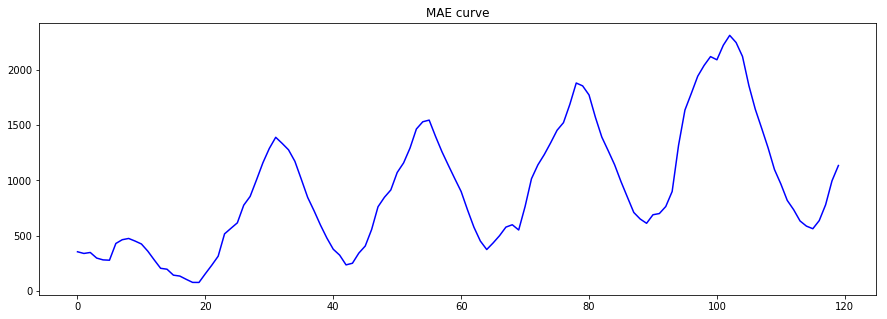

In [2]:
def mymodel(data_train, n_test):
    n = data_train.shape[0]
    p = data_train.shape[1]
    output = np.ones((n_test, p))
    for i in range(p):
        temp_data = data_train.iloc[:, i].values.reshape((n, 1))
        try:
            mod = ARIMA(temp_data, order=(1, 0, 1))
            results = mod.fit()
            output[:, i] = results.predict(start=n+1, end=n+n_test-1)
        except:
            rep = n_test // 24
            res = n_test % 24
            temp = temp_data[-25:-1, 0].reshape((1, 24))[0].tolist()
            output[:, i] = temp*rep + temp[0: res]
    return pd.DataFrame(output)


result = local_model_to_err(model=mymodel, p=10)
err = result.iloc[0, 0]
print(err)
err_curve = result.iloc[:, 1]

plt.figure(figsize=(15,5))
plt.plot(err_curve, 'blue')
plt.title("MAE curve")
plt.show()

If left the mdoel parameter blank, it will give you defualt mdoel where the predictions are last observed values

1766.5024793388432


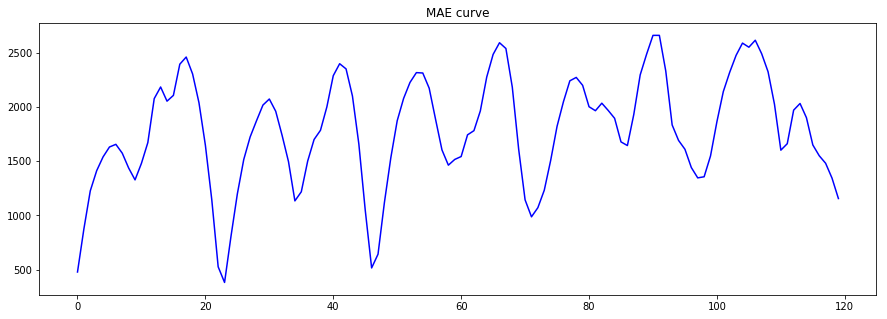

In [3]:
result = local_model_to_err(p=10)
err = result.iloc[0, 0]
print(err)
err_curve = result.iloc[:, 1]

plt.figure(figsize=(15,5))
plt.plot(err_curve, 'blue')
plt.title("MAE curve")
plt.show()